### Data Information
fixed acidity: :most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

chlorides: the amount of salt in the wine.

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

density: the density of wine is close to that of water depending on the percent alcohol and sugar content.

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

alcohol: the percent alcohol content of the wine.

quality: output variable (based on sensory data, score between 0 and 10).

### Import the necessary libraries

In [ ]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
from prettytable import PrettyTable

### Reading the dataset

In [ ]:
df = pd.read_csv("winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### No of Rows and columns in dataset

In [ ]:
df.shape

(1599, 12)

### Replace " " with "_" for each column

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

### Checking for any missing values and object data types


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking different statistical measures for each attribute

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Using countplot to see quality distribution among wine samples in the dataset 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

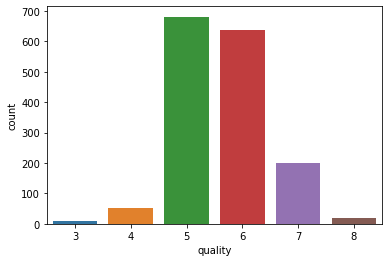

In [ ]:
sns.countplot(df['quality'])
df['quality'].value_counts()

### Checking correlation between quality and other attributes

In [ ]:
correlations = df.corr()['quality'].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

### Visualizing above using barplot 

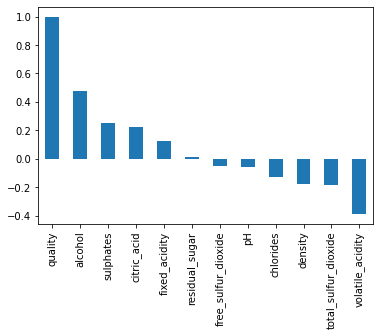

In [ ]:
correlations.plot(kind='bar')

### Plotting correlation matrix and visualizing using heatmap

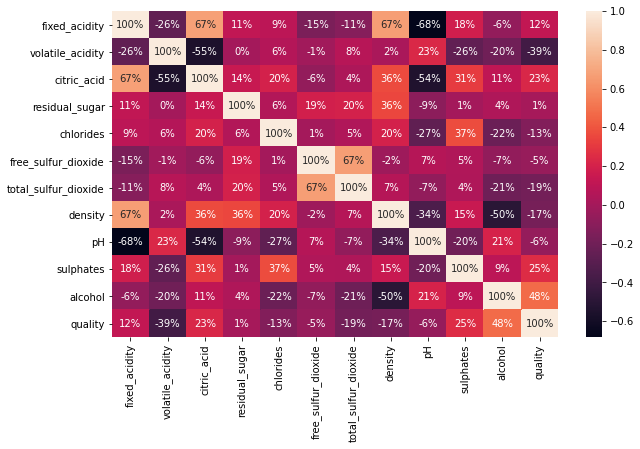

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

### Using threshold value of 0.2 to find out strong correation features

In [ ]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


### Plotting boxplot between quality and alcohol

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

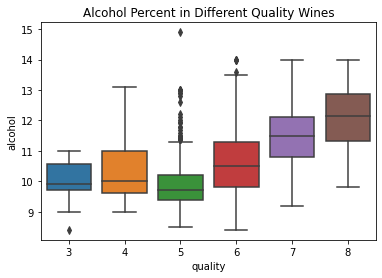

In [ ]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

### Creating subest of quality 5 and 6 values

In [ ]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

### Correlation values in subset between quality andother attributes

In [ ]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
correlations_subset

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric_acid             0.080146
fixed_acidity           0.053447
pH                      0.043065
residual_sugar         -0.018452
free_sulfur_dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile_acidity       -0.237193
total_sulfur_dioxide   -0.239067
Name: quality, dtype: float64

### Checking Sulphates and Citric Acid Presence in dataset

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

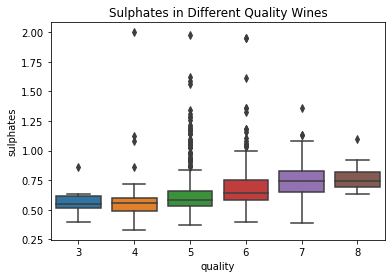

In [ ]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

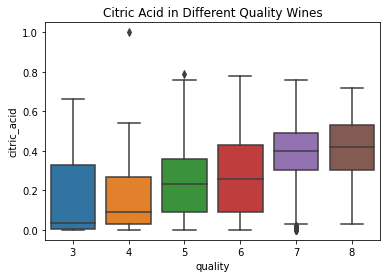

In [ ]:
bp = sns.boxplot(x='quality',y='citric_acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

### Checking presence of acetic acid

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

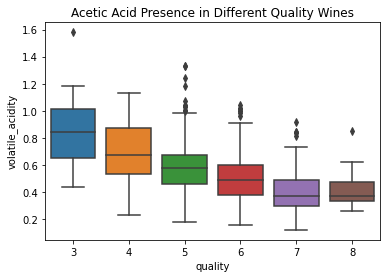

In [ ]:
bp = sns.boxplot(x='quality',y='volatile_acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

### Creating categories of low,medium and high for the different quality values

In [ ]:
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

### Checking distribution for the new categories

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


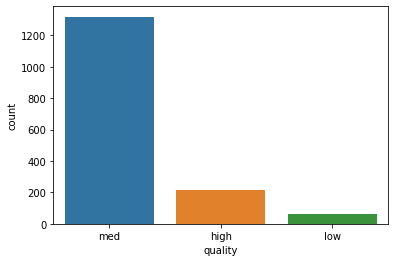

In [ ]:
sns.countplot(df_aux['quality'])

### Visualizing behaviour of different attributes with quality

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


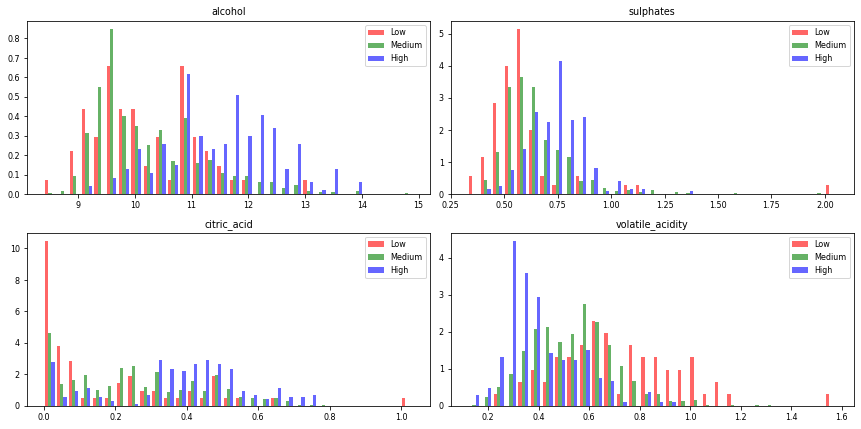

In [ ]:
flistt = ['alcohol','sulphates','citric_acid','volatile_acidity']
low = df_aux[df_aux['quality'] == 'low']
medium = df_aux[df_aux['quality'] == 'med']
high = df_aux[df_aux['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,6))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    binwidth= (max(df_aux[flistt[i]]) - min(df_aux[flistt[i]]))/30
    bins = np.arange(min(df[flistt[i]]), max(df_aux[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6, density=True, label=['Low','Medium','High'], color=['red','green','blue'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])
plt.tight_layout()

### Feature Selection

In [ ]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric_acid         0.226373
volatile_acidity   -0.390558
Name: quality, dtype: float64

### Estimating quality using Linear Regression, Decision Tree Rregressor and Random Forest Regressor

#### Dividing data into training and test set

In [ ]:
X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

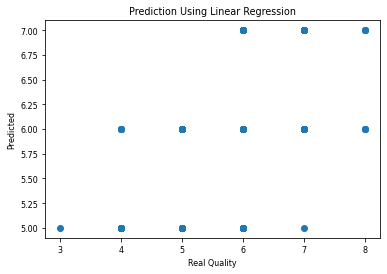

In [ ]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

#### Confusion Matrix for the Linear Regression Model

Text(34.0, 0.5, 'True Quality')

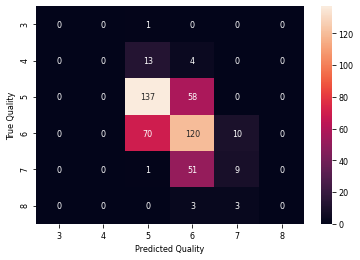

In [ ]:
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality')
label_aux.set_ylabel('True Quality')

#### Decision Tree Regressor

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)

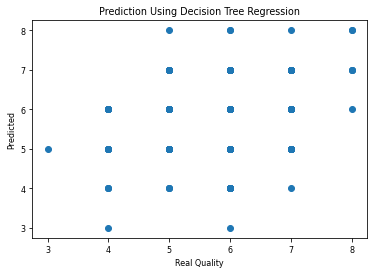

In [ ]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

#### Confusion Matrix for the Decission Tree Regression Model

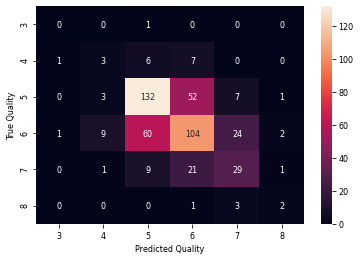

In [ ]:
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#### Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

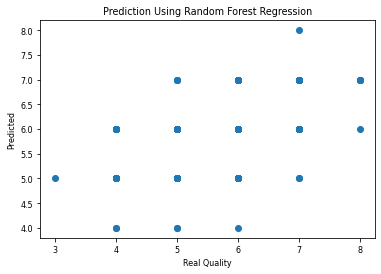

In [ ]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

#### Confusion Matrix for the Random Forest Regression Model


Text(34.0, 0.5, 'True Quality')

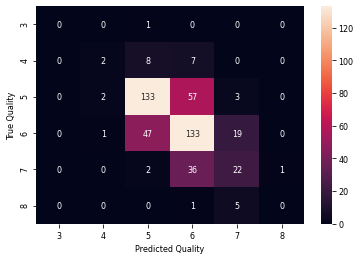

In [ ]:
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality')

### Finding accuracy for the different models

In [ ]:
acc_lr = accuracy_score(y_test,y_prediction_lr)
print("accuracy score for linear regresion is ",acc_lr,"\n")
acc_dt = accuracy_score(y_test,y_prediction_dt)
print("accuracy score for decision tree is ",acc_dt,"\n")
acc_rf = accuracy_score(y_test,y_prediction_rf)
print("accuracy score for random forest is ",acc_rf,"\n")

accuracy score for linear regresion is  0.5541666666666667 

accuracy score for decision tree is  0.5625 

accuracy score for random forest is  0.6041666666666666 



### Finding root mean squared error for different models

#### Linear Regression RMSE

In [ ]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

0.7085783889827104


#### Decision Tree Regressor RMSE

In [ ]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print(RMSE)

0.8440971508067067


#### Random Forest Regression RMSE

In [ ]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

0.699702317656111


### Improving results using 1-Off Accuray

In [ ]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

#### Confusion Matrix for the Linear Regression Model

Text(34.0, 0.5, 'True Quality')

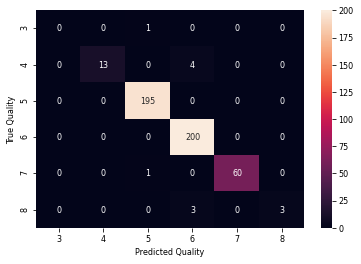

In [ ]:
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality')

#### Confusion Matrix for the Decission Tree Regression Model


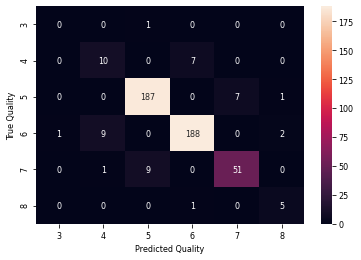

In [ ]:
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

#### Confusion Matrix for the Random Forest Regression Model

Text(34.0, 0.5, 'True Quality')

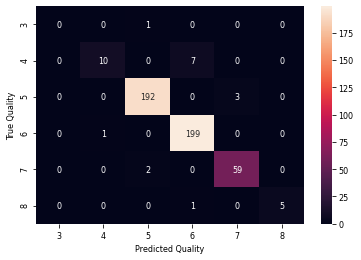

In [ ]:
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality')

### Calculating accuracy for the models after 1 off accuracy

In [ ]:
acc_lr = accuracy_score(y_test,y_prediction_lr)
print("accuracy score for linear regresion is ",acc_lr,"\n")
acc_dt = accuracy_score(y_test,y_prediction_dt)
print("accuracy score for decision tree is ",acc_dt,"\n")
acc_rf = accuracy_score(y_test,y_prediction_rf)
print("accuracy score for random forest is ",acc_rf,"\n")

accuracy score for linear regresion is  0.98125 

accuracy score for decision tree is  0.91875 

accuracy score for random forest is  0.96875 



### Calculating new RMSE values for the models

In [ ]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.27386127875258304

RMSE for new improved Decision Tree Regression is: 0.5968668193156661

RMSE for new improved Random Forest Regression is: 0.3535533905932738



### Checking Precision, Recall and F1 Score values for the models

In [ ]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'), 
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+---------+--------------------+
| Regressor Model |     Precision      |  Recall |      F1Score       |
+-----------------+--------------------+---------+--------------------+
|      Linear     | 0.9797021240507777 | 0.98125 | 0.9787385410477942 |
|  Decision Tree  | 0.9225545595229163 | 0.91875 | 0.9202198458894887 |
|  Random Forest  | 0.9661947165672622 | 0.96875 | 0.9660315070376045 |
+-----------------+--------------------+---------+--------------------+
